<a href="https://colab.research.google.com/github/s2tandu0p/sales-forecast/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
filename = '/content/drive/MyDrive/Personal/Dojo Data/data/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. How many rows and columns? ***8523 rows and 12 columns***

---



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


2. what are the datatypes of each variable

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. are there duplicates? if so, drop any duplicates*** No***

In [6]:
df.duplicated().sum()

0

In [7]:
df.loc[df.duplicated(), :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


4,5,&6. Identify missing values

In [8]:
# look for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# create a new df with missing values
missing_df = df[['Item_Weight', 'Outlet_Size']]
missing_df.head()

# I have weight missing here assuming that's the weight of the product
# based on my limited knowledge of this data set;
# i do not believe weight is going to affect the sales, without knowing the unit
# so for missing weight, i'm going to use average to fill in missing data for weight

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df['Item_Weight'].isnull().sum()
df.head()

# for missing outlet size
# i do believe the size of the outlet would affect sales
# human nature
# some might want to go to smaller stores and some big stores
# i'd like to do multiple with large, small, medium fillna
# but due to time, i'm going to use 'Medium' to fillna

df['Outlet_Size'].fillna('Medium', inplace = True)
df['Outlet_Size'].isnull().sum()

df.head()
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


0

7. find and fix any inconsistent categories of data


In [10]:
# look for unique values for each column
for col in df:
    print(df[col].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       12.85764518 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         8.88       20.5
 13.5         

In [11]:
# lowfat column should be fixed for consistency
# maybe supermarket column too but i'm going to skip for now
# make low fat column with 'Low Fat' and 'Regular'

fat_filter_1 = df['Item_Fat_Content'] == 'low fat'
fat_filter_2 = df['Item_Fat_Content'] == 'LF'
regular_filter = df['Item_Fat_Content'] == 'reg'

df[fat_filter_2 | fat_filter_1]

df.loc[fat_filter_2 | fat_filter_1, 'Item_Fat_Content'] = 'Low Fat'
df.loc[regular_filter, 'Item_Fat_Content'] = 'Regular'

print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


8.  For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [12]:
# creat df with only numerical columns in

float_df = df.select_dtypes('float64')
float_df.head()



,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


In [13]:
for col in float_df:
    min = float_df[col].min()
    max = float_df[col].max()
    mean = float_df[col].mean()
    print(col, 'summary statistics are:', 'min=', min, 'max=', max, 'mean=', mean )

# not sure if groupby or pivot can be used here and how??  

Item_Weight summary statistics are: min= 4.555 max= 21.35 mean= 12.857645184136409
Item_Visibility summary statistics are: min= 0.0 max= 0.328390948 mean= 0.06613202877895127
Item_MRP summary statistics are: min= 31.29 max= 266.8884 mean= 140.9927819781768
Item_Outlet_Sales summary statistics are: min= 33.29 max= 13086.9648 mean= 2181.2889135750365


In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


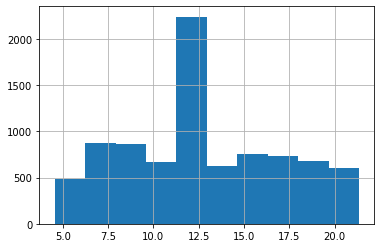

In [15]:
# histogram to view the distributions of various features in the dataset
df['Item_Weight'].hist();

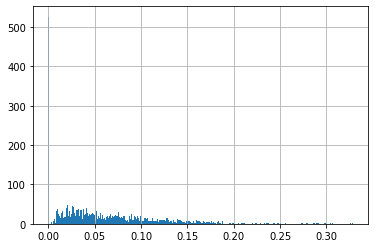

In [16]:
df['Item_Visibility'].hist(bins = 1000);

In [17]:

# want to see if all 0 Item_Visibility has no sales
zero_vis_filter = df['Item_Visibility'] == 0
zero_sales_filter = df['Item_Outlet_Sales'] == 0
df[zero_sales_filter & zero_sales_filter]

# this returns nothing, meaning all items have sales.
# this makes sense if they are in the "back"
# these items are not visible but buyers might still be aware of them.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


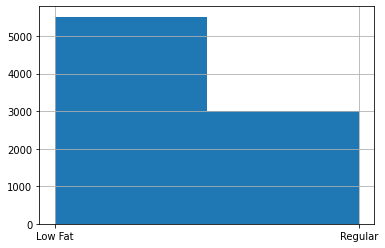

In [18]:
df['Item_Fat_Content'].hist(bins = 2);

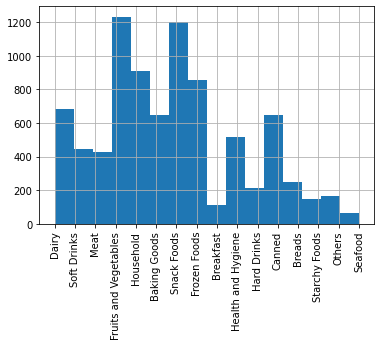

In [19]:
df['Item_Type'].hist(bins = 16);
plt.xticks(rotation = 90);

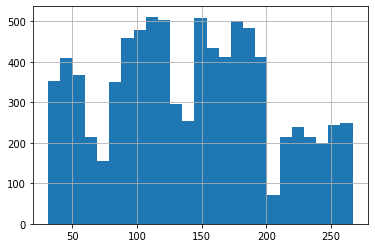

In [20]:
df['Item_MRP'].hist(bins = 25);

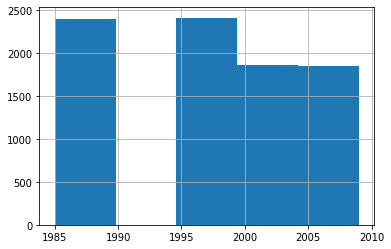

In [21]:
df['Outlet_Establishment_Year'].hist(bins = 5)

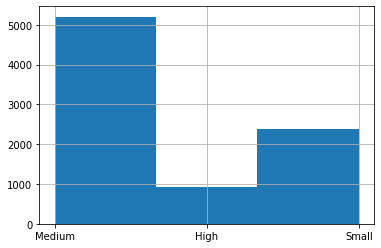

In [22]:
df['Outlet_Size'].hist(bins = 3);

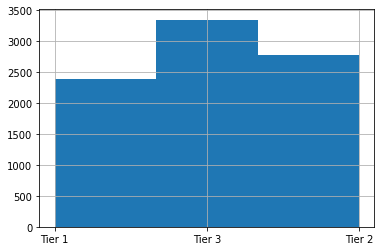

In [23]:
df['Outlet_Location_Type'].hist(bins=3);

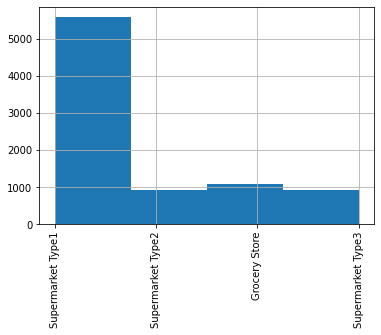

In [24]:
df['Outlet_Type'].hist(bins=4);
plt.xticks(rotation = 90);

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


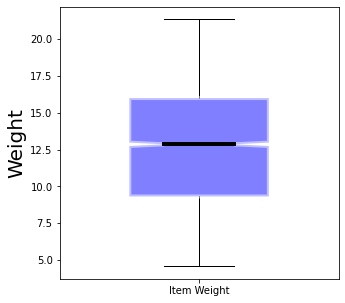

In [26]:
weight_df = df.loc[:, 'Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
boxplots = axes.boxplot([weight_df],
                         notch = True,
                         labels = ['Item Weight'],
                         patch_artist = True,
                         widths = 0.5,
                         medianprops = dict(linestyle='-', linewidth = 4, color='black'),
                         boxprops = dict(linestyle='--', linewidth = 4, color = 'white', facecolor='blue', alpha=0.5)
                         );

plt.ylabel('Weight', fontsize = 20);

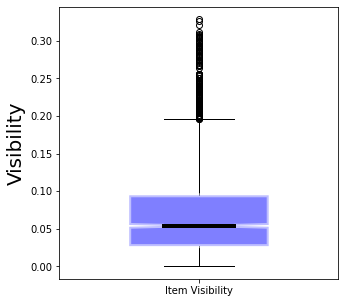

In [27]:
visibility_df = df.loc[:, 'Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
boxplots = axes.boxplot([visibility_df],
                         notch = True,
                         labels = ['Item Visibility'],
                         patch_artist = True,
                         widths = 0.5,
                         medianprops = dict(linestyle='-', linewidth = 4, color='black'),
                         boxprops = dict(linestyle='--', linewidth = 4, color = 'white', facecolor='blue', alpha=0.5)
                         );

plt.ylabel('Visibility', fontsize = 20);

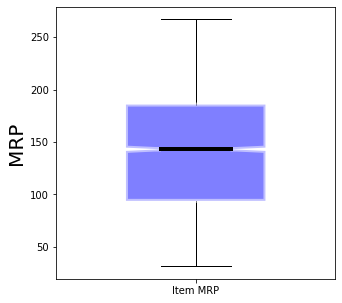

In [28]:
MRP_df = df.loc[:, 'Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
boxplots = axes.boxplot([MRP_df],
                         notch = True,
                         labels = ['Item MRP'],
                         patch_artist = True,
                         widths = 0.5,
                         medianprops = dict(linestyle='-', linewidth = 4, color='black'),
                         boxprops = dict(linestyle='--', linewidth = 4, color = 'white', facecolor='blue', alpha=0.5)
                         );

plt.ylabel('MRP', fontsize = 20);

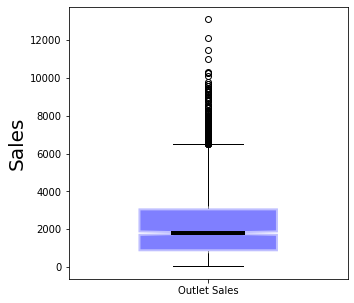

In [29]:
sales_df = df.loc[:, 'Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
boxplots = axes.boxplot([sales_df],
                         notch = True,
                         labels = ['Outlet Sales'],
                         patch_artist = True,
                         widths = 0.5,
                         medianprops = dict(linestyle='-', linewidth = 4, color='black'),
                         boxprops = dict(linestyle='--', linewidth = 4, color = 'white', facecolor='blue', alpha=0.5)
                         );

plt.ylabel('Sales', fontsize = 20);

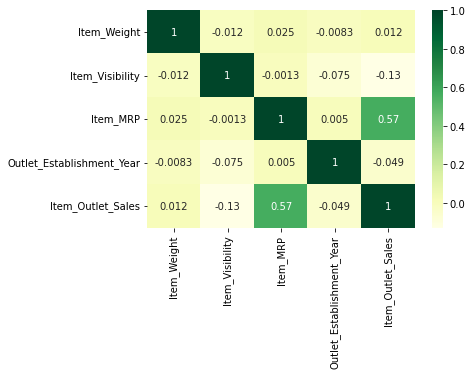

In [30]:
corr = df.corr()
sns.heatmap(corr, cmap = 'YlGn', annot = True);

In [30]:
# 

# **Project 1 Part 4**

Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).

In [31]:
# according to the corr above
# for sales
# MRP is moderately positive correlated with Sales


Scatter Plot for MRP and Sales

In [65]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


Text(0.5, 1.0, 'Corr between MRP and Outlet Sales')

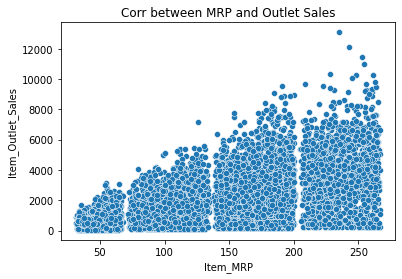

In [66]:
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales');
plt.title('Corr between MRP and Outlet Sales')

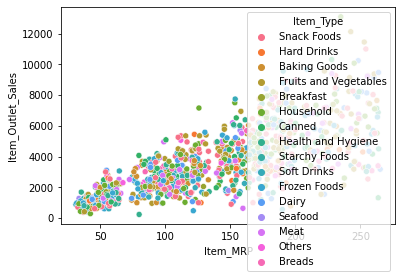

In [56]:
# Testing
outlet27Filter = df['Outlet_Identifier'] == 'OUT027'
df_outlet027 = df[outlet27Filter]

sns.scatterplot(data=df_outlet027, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type');

In [ ]:
# Testing
outlet27Filter = df['Outlet_Identifier'] == 'OUT027'
df_outlet027 = df[outlet27Filter]

sns.scatterplot(data=df_outlet027, x='Item_MRP', y='Item_Outlet_Sales');

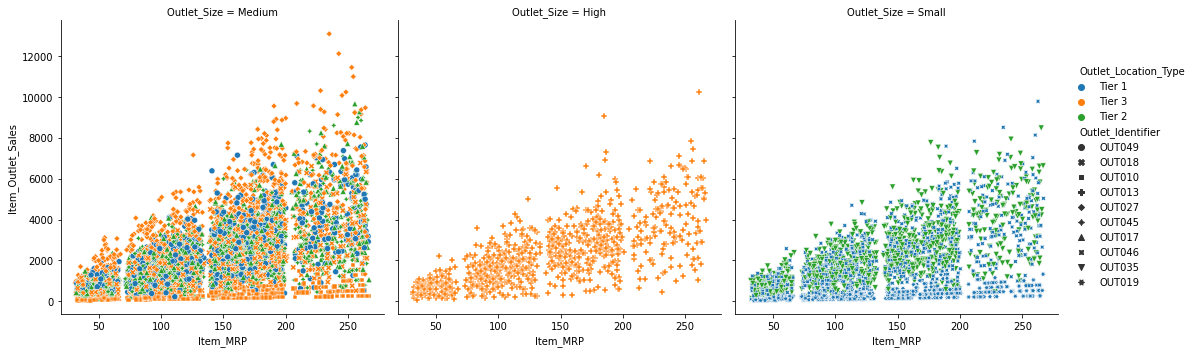

In [60]:
# Testing
sns.relplot(
    data=df, x="Item_MRP", y="Item_Outlet_Sales",
    col="Outlet_Size", hue="Outlet_Location_Type", style="Outlet_Identifier",
    kind="scatter"
);

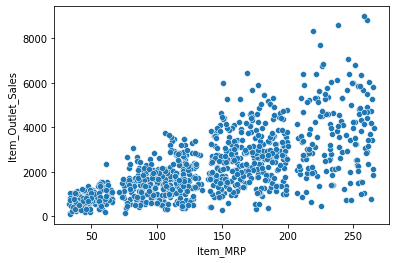

In [59]:
#Testing
outlet45Filter = df['Outlet_Identifier'] == 'OUT045'
df_outlet045 = df[outlet45Filter]

sns.scatterplot(data=df_outlet045, x='Item_MRP', y='Item_Outlet_Sales');

Same Item Type, if low fat has a higher sales or regular has a higher sales

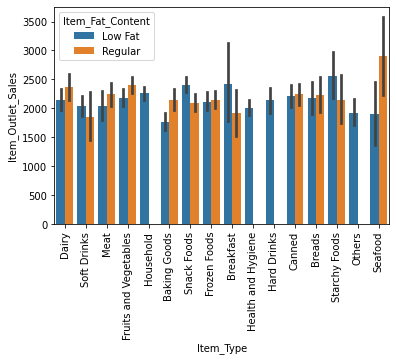

In [68]:
sns.barplot(x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", data=df);
plt.xticks(rotation=90);
plt.title('Corr between Item Type and Sales')




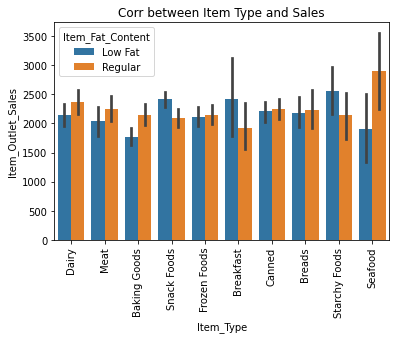

In [72]:
# Household, Health and Hygiene, Hard Drinks, and Others can be excluded as nothing to compare regular vs. low fat
# Soft Drinks, Fruits and Vegetables can be excluded as well as usually people dont care too much about fat in them (or do they?)

softDrinks = df['Item_Type'] == 'Soft Drinks'
fruitAndVeges = df['Item_Type'] == 'Fruits and Vegetables'
household = df['Item_Type'] == 'Household'
healthAndHygiene = df['Item_Type'] == 'Health and Hygiene'
hardDrinks = df['Item_Type'] == 'Hard Drinks'
others = df['Item_Type'] == 'Others'

df_fat = df.loc[~softDrinks & ~fruitAndVeges & ~household & ~healthAndHygiene & ~hardDrinks & ~others, :]
df_fat.head()

sns.barplot(x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content", data=df_fat);
plt.xticks(rotation=90);
plt.title('Corr between Item Type and Sales');

In [ ]:
# for Dairy, Meat, Baking Goods, and Seafood, Regular fat content products tend to have higher sales
# for snack foods, breakfast, and starchy foods, low fat content products tend to have higher sales